In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tools import local_max

In [3]:
xValReal, yValReal = np.genfromtxt("/work/data/day_3/real_calibration_profile.txt",skip_header = 1,delimiter = '\t',unpack = True)
xValFour, yValFour = np.genfromtxt("/work/data/day_3/fourier_calibration_profile.txt",skip_header = 1,delimiter = '\t',unpack = True)

# know
# size of sensor = 5.9558 mm across
# number of pixels horizontaly is = 1440 px
# so mm/px = 5.95585/1440

mm_per_px = 5.95585/1440

print(mm_per_px)

0.004136006944444445


## Quantifying Uncertainty

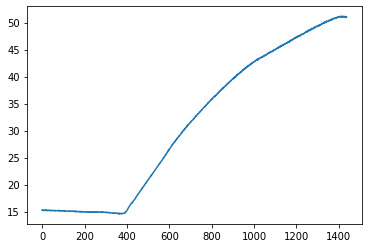

In [5]:
xVal, yVal = np.genfromtxt("/work/data/day_4/Computer_callibration.txt",skip_header = 1,delimiter = '\t',unpack = True)

plt.plot(xVal,yVal,"k.",markersize = 1)
plt.xlabel("Pixels from Left")
plt.ylabel("Intensity [GreyScale]")
plt.title("No LED, Facing Computer")

# xVal, yVal = np.genfromtxt("/work/data/day_4/Covered_callibration.txt",skip_header = 1,delimiter = '\t',unpack = True)
# xVal, yVal = np.genfromtxt("/work/data/day_4/LED_off_callibration.txt",skip_header = 1,delimiter = '\t',unpack = True)

## Data Collection/Preparation and Ronchi Callibration

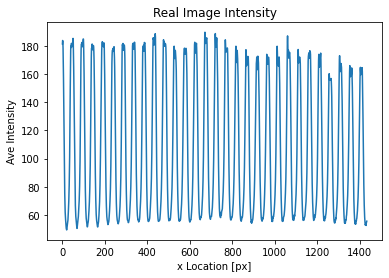

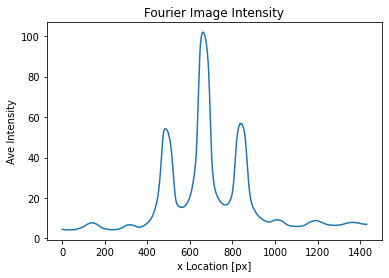

In [ ]:
plt.plot(xValReal,yValReal)
plt.xlabel("x Location [px]")
plt.ylabel("Ave Intensity")
plt.title("Real Image Intensity")
#plt.savefig("/work/notes/preliminary_ronchi/RealIntensityProfile1.pdf",dpi=300)
plt.show()

plt.plot(xValFour,yValFour)
plt.xlabel("x Location [px]")
plt.ylabel("Ave Intensity")
plt.title("Fourier Image Intensity")
#plt.savefig("notes/preliminary_ronchi/FourierIntensityProfile1.pdf",dpi=300)
plt.show()

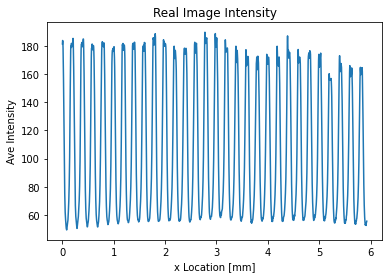

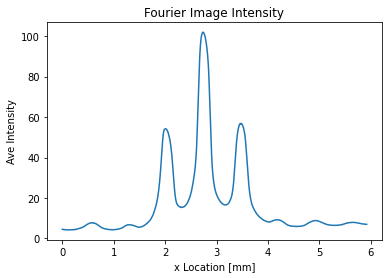

In [ ]:
plt.plot(xValReal*mm_per_px,yValReal)
plt.xlabel("x Location [mm]")
plt.ylabel("Ave Intensity")
plt.title("Real Image Intensity")
plt.savefig("notes/data_prep/RealCallibration.pdf",dpi=300)
plt.show()

plt.plot(xValFour*mm_per_px,yValFour)
plt.xlabel("x Location [mm]")
plt.ylabel("Ave Intensity")
plt.title("Fourier Image Intensity")
plt.savefig("notes/data_prep/FourierCallibration.pdf",dpi=300)
plt.show()

## Callibration 1 - Real image edges

Real Image Callibration
a = 0.201 +/- 0.007 [mm]
b = 0.100 +/- 0.004 [mm]


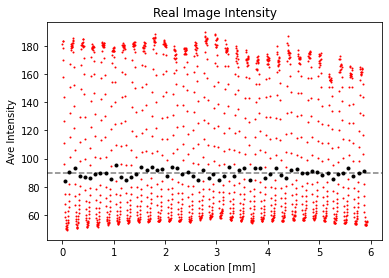

In [ ]:
# Callibration via real image  ####################################################################################################

interceptAxis = 90

realCallibrationArray = -np.abs(yValReal-interceptAxis)
real_mids,real_mids_idx = local_max(realCallibrationArray,N=20)

a = 2*np.average(np.diff(xValReal[real_mids_idx]*mm_per_px))
a_err = np.std(np.diff(xValReal[real_mids_idx]*mm_per_px))*2
b = a/2
b_err = a_err/2

print("Real Image Callibration")
print(f"a = {a:.3f} +/- {a_err:.3f} [mm]")
print(f"b = {b:.3f} +/- {b_err:.3f} [mm]")

plt.plot(xValReal*mm_per_px,yValReal,"r.",markersize = 2)
plt.axhline(interceptAxis,linestyle = 'dashed',color = "Grey")
plt.plot(xValReal[real_mids_idx]*mm_per_px,yValReal[real_mids_idx],'k.')

plt.xlabel("x Location [mm]")
plt.ylabel("Ave Intensity")
plt.title("Real Image Intensity")
plt.show()

## Callibration 2 - Fourier image scale '$k_a$ space'  to match peaks

RAW PEAK AMPLITUDE
F_-3.0	= 7.772
F_-2.0	= 6.798
F_-1.0	= 54.212
F_0.0	= 101.919
F_1.0	= 56.850
F_2.0	= 9.258
F_3.0	= 8.854
F_4.0	= 7.965
[56.8498, 9.2575, 8.8545, 7.9646]
[54.2118, 6.7976, 7.7724, 0]
[55.5308, 8.02755, 8.31345, 3.9823]


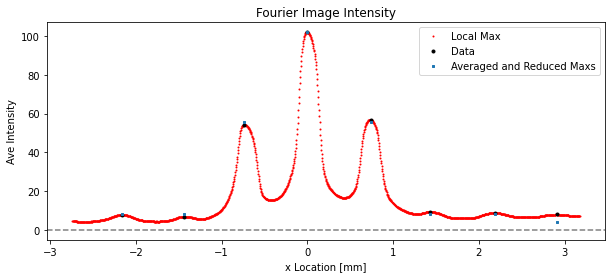


Average Distance Between Peaks	= 0.724 +/- 0.021 [mm]
/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


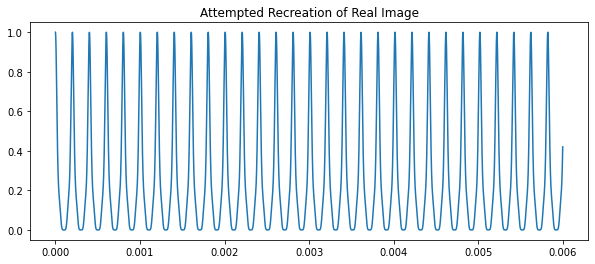

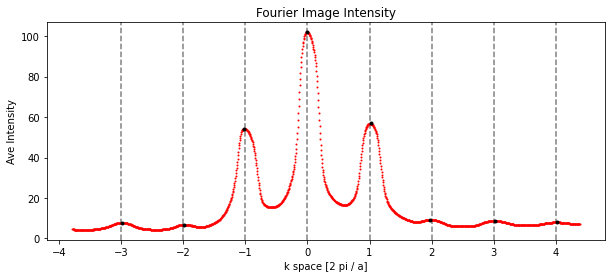

Average K_a Between Peaks	= 1.000 +/- 0.029 [2 pi / a]	 < This should be 1 if we set a correctly

[0.99954192 0.96527213 1.01667681 1.01667681 0.95384886 1.04523495
 1.00525355]


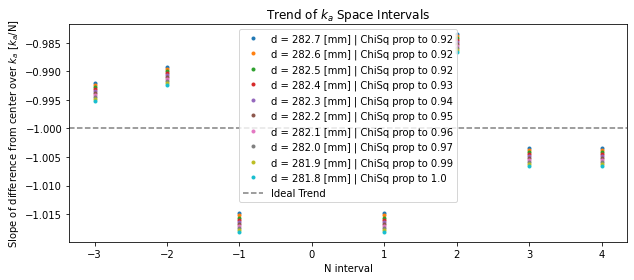

In [ ]:
# Plot the fourier image in k_a space and scale the k_a axis by varying K until it lines up with  intiger tics
# find fourier peaks and center images  ############################################################################################
fourierPeaks, fourierPeaks_idx = local_max(yValFour,N=80)
x_center = xValFour[fourierPeaks_idx[fourierPeaks == np.max(fourierPeaks)]]*mm_per_px


centre = (len(fourierPeaks))/2-1
pArray = []
nArray = []
t0 = 0
print("RAW PEAK AMPLITUDE")
for _, coef in enumerate(fourierPeaks):
    if _-centre < 0:
        nArray.append(coef)
    if _-centre > 0:
        pArray.append(coef)
    if _-centre == 0:
        t0 = coef
    print(f"F_{_-centre}\t= {coef:.3f}")

nArray = nArray[::-1]
pArray = pArray[::1]
nArray.append(0)

print(pArray)
print(nArray)

tArray = []
for p,n in zip(pArray,nArray):
    tArray.append(np.mean([p,n])-0*8.02755)

print(tArray)

fig = plt.figure(figsize = (10,4))
plt.plot(xValFour*mm_per_px-x_center,yValFour,'r.',markersize = 2,label = "Local Max")
plt.plot(xValFour[fourierPeaks_idx]*mm_per_px-x_center,fourierPeaks,'k.',label= "Data")
leveledPeaks = np.concatenate((tArray[2::-1],np.array([t0]),tArray))
plt.axhline(0,linestyle = "dashed",color = "Grey")
plt.plot(xValFour[fourierPeaks_idx]*mm_per_px-x_center,leveledPeaks,'s',label = "Averaged and Reduced Maxs",markersize = 2)
plt.xlabel("x Location [mm]")
plt.ylabel("Ave Intensity")
plt.title("Fourier Image Intensity")
plt.legend()
plt.savefig("/work/notes/callibration/callibration_fA_xspace.pdf",dpi = 300)
plt.show()


distBetweenPeaks = np.diff(xValFour[fourierPeaks_idx]*mm_per_px)
print(f"\nAverage Distance Between Peaks\t= {np.mean(distBetweenPeaks):.3f} +/- {np.std(distBetweenPeaks):.3f} [mm]")

def FourrierFunc_Intensity(x,a,t0,posArray,negArray):
    k = 2*np.pi/a
    outArray = []
    enumArrayP = np.arange(1,len(posArray)+1)
    enumArrayN = np.arange(1,len(negArray)+1)
    for x_val in x:
        positives = np.sum( posArray * np.exp( (-1j*(enumArrayP)*k*x_val) ) )
        negatives = np.sum( negArray * np.exp( ( 1j*(enumArrayN)*k*x_val) ) )
        total = t0 + positives + negatives
        
        outArray.append(total*np.conjugate(total))
    return np.array(outArray)

a_val = (a)*10**(-3)
fig = plt.figure(figsize = (10,4))
xspace_temp = np.linspace(0,6,5000)*10**(-3)
yspace_temp = FourrierFunc_Intensity(xspace_temp,a_val,t0,tArray,tArray)
yspace_temp /= np.max(yspace_temp)
plt.plot(xspace_temp,yspace_temp)
plt.title("Attempted Recreation of Real Image")
plt.show()

# Now do it in k space #############################################################################################################
def xspace_to_kspace(x_space,a,d,wavelength = 515*10**(-9)):
    return (a/wavelength)*np.sin(np.arctan(x_space/d))

aperture_image_dist = (282.2)*10**(-3)
a_val = (0.2007)*10**(-3)

fig = plt.figure(figsize = (10,4))
k_space = xspace_to_kspace((xValFour*mm_per_px-x_center)*10**(-3),a_val,aperture_image_dist)
for _ in range(8):
    plt.axvline(_-3,linestyle = "dashed",color = "Grey")
plt.plot(k_space,yValFour,'r.',markersize = 2)
plt.plot(k_space[fourierPeaks_idx],fourierPeaks,'k.')
plt.xlabel("k space [2 pi / a]")
plt.ylabel("Ave Intensity")
plt.title("Fourier Image Intensity")
plt.savefig("/work/notes/callibration_fA_kspace.pdf",dpi = 300)
plt.show()

distBetweenPeaks_in_k = xspace_to_kspace(distBetweenPeaks*10**(-3),a_val,aperture_image_dist)#*(2*np.pi)
print(f"Average K_a Between Peaks\t= {np.mean(distBetweenPeaks_in_k):.3f} +/- {np.std(distBetweenPeaks_in_k):.3f} [2 pi / a]\t < This should be 1 if we set a correctly")
print()
print(distBetweenPeaks_in_k)

xaxis = np.arange(-3,5,1) #np.arange(0,1,1/len(distBetweenPeaks_in_k))
fig = plt.figure(figsize = (10,4))

distances = aperture_image_dist - np.arange(-0.5,0.5,0.1)*10**(-3)
for dist in distances:
    k_space = xspace_to_kspace((xValFour*mm_per_px-x_center)*10**(-3),a_val,dist)
    yspace = -np.abs(k_space[fourierPeaks_idx][xaxis != 0])/np.abs(xaxis[xaxis != 0])
    res = yspace + 1
    chiSquared = np.sum(res**2)
    plt.plot(xaxis[xaxis != 0],yspace,'.',label = f"d = {np.around(dist*1000,1)} [mm] | ChiSq prop to {np.around(chiSquared*1000,2)}");
plt.axhline(-1,linestyle = 'dashed',color = "Grey",label = "Ideal Trend");
plt.title(r"Trend of $k_a$ Space Intervals")
plt.xlabel("N interval")
plt.ylabel(r"Slope of difference from center over $k_a$ [$k_a$/N]")
plt.legend()
plt.show()

# Plot the resultant k space separation 
"""
a_to_test = ( 0.2 + np.linspace(-0.03,0.03,100) )*10**(-3)
for a_val in a_to_test:
    k_space = xspace_to_kspace(distBetweenPeaks*10**(-3),a_val,aperture_image_dist)
    print(k_space)
    distBetweenPeaks_in_k     = np.mean(k_space)
    distBetweenPeaks_in_k_err =  np.std(k_space)
    plt.errorbar(a_val,distBetweenPeaks_in_k,yerr = distBetweenPeaks_in_k_err)
plt.show()""";


## Callibration 3 - Fit model fourier series to fourier space

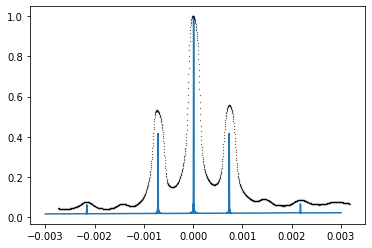

Best Fit Parameters
 a_opt = 0.00021961 +/- 4.28e-06
 D_opt = 0.3081529 +/- 0.00599995
 O_opt = 1.446e-05 +/- 1.8e-07
 H_opt = 0.04038793 +/- 0.00198081
 S_opt = 3.02882095 +/- 0.38531454

Fit Statistics
 ChiSq = 10473.987346178745 +/- 53.422841556772326
 nu = 1427
 Reduced Chi = 7.339864993818321


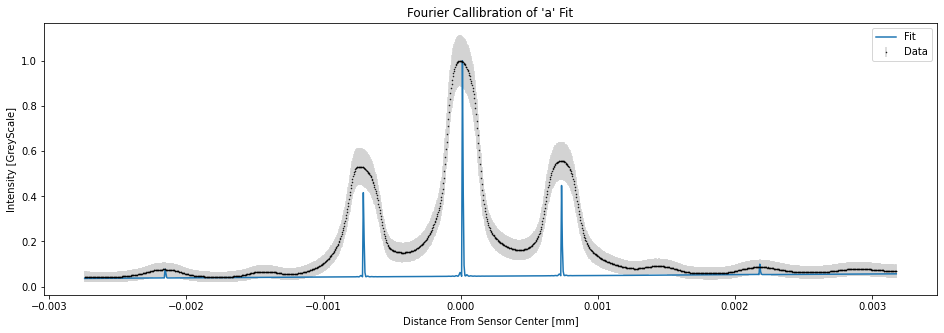

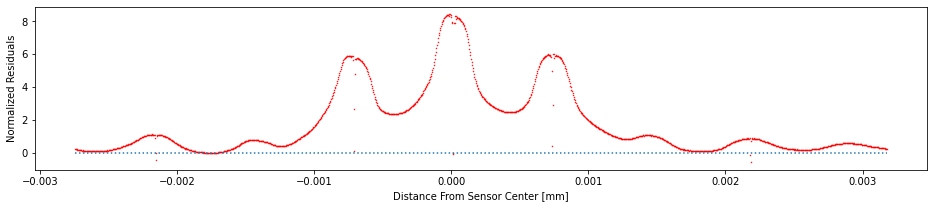

In [ ]:
# set some finite N
# curve fit the N terms to our data
# from it extract a
# careful! need appropriate number of N so that our fit statistics are meaningfull
# ie. 1440 datapoints so dont exceed like 20 fit parameters?

# Write out a fxn to fit in lab
def n_slitDiffraction(theta,wavelength,a,b,N):
    pi = np.pi
    beta = pi*b/(wavelength)*np.sin(theta)
    alpha = pi*a/(wavelength)*np.sin(theta)
    
    relativeIntensity = ((np.sin(beta)/beta)**2)*((np.sin(N*alpha)/np.sin(alpha))**2)/N**2
    return relativeIntensity

def fourierSpaceCallibrationModel(x,a,D,O = 0, H = 0,slope = 0,N = 95,wavelength = 515*10**(-9)):
    b = a/2
    theta = np.arctan((x-O)/D)
    intensity = n_slitDiffraction(theta,wavelength,a,b,N) + H + slope*x
    intensity /= np.max(intensity)
    return intensity

xdat = np.array((xValFour*mm_per_px-x_center)/1000) # in mm
ydat = np.array(yValFour/np.max(yValFour)) # normalized
GreyValMax = 255
SensorWellMax = 20000
nrowsAvreaged = 1
alpha = np.sqrt( ydat*GreyValMax/(SensorWellMax*nrowsAvreaged) )
xtitle = "Distance From Sensor Center [mm]"
ytitle = "Intensity [GreyScale]"
figtitle = "Fourier Callibration of 'a' Fit"
width = 16
height = 3
#plt.plot(xdat,ydat)
#plt.show()

# initial parameter guesses from inspection of intercept and slope
a_init = 0.201 *10**(-3)
D_init = 282 *10**(-3)
offset_init = 0.00001
height_init = 0.02
slope_init = 1

x = np.linspace(-3,3,5000)*10**(-3)
y = fourierSpaceCallibrationModel(x,a_init,D_init,offset_init,height_init,slope_init)

plt.plot(x,y)
plt.plot(xdat,ydat,"k.",markersize = 0.5)
plt.show()

param_bounds=([0.0005*10**(-3),1*10**(-3),-1000,0,-100],[0.5 *10**(-3),1000 *10**(-3),1000,0.1,100])

# Performe curve fit
pOpt, pCov = curve_fit(fourierSpaceCallibrationModel, xdat, ydat,   #p0opt = optimized values of fitting paramters, pCov = covariance matrix
                       p0=[a_init,D_init,offset_init,height_init,slope_init],
                       bounds = param_bounds,
                       sigma=alpha,
                       absolute_sigma=True)
a_opt = pOpt[0]
D_opt = pOpt[1]
O_opt = pOpt[2]
H_opt = pOpt[3]
S_opt = pOpt[4]
alpha_vec = np.sqrt(np.diag(pCov))
alpha_a_opt = alpha_vec[0]
alpha_D_opt = alpha_vec[1]
alpha_O_opt = alpha_vec[2]
alpha_H_opt = alpha_vec[3]
alpha_S_opt = alpha_vec[4]

# Print best fit parameters
dec = 8 # set resolution of output rounding
print("Best Fit Parameters\n a_opt =",np.around(a_opt,dec),"+/-",np.around(alpha_a_opt,dec))
print(" D_opt =",np.around(D_opt,dec),"+/-",np.around(alpha_D_opt,dec))
print(" O_opt =",np.around(O_opt,dec),"+/-",np.around(alpha_O_opt,dec))
print(" H_opt =",np.around(H_opt,dec),"+/-",np.around(alpha_H_opt,dec))
print(" S_opt =",np.around(S_opt,dec),"+/-",np.around(alpha_S_opt,dec))

# Calculate Residuals
res = ydat - fourierSpaceCallibrationModel(xdat,*pOpt)
normRes = res/alpha

# Calculate Chi squared statistics
N = len(xdat)
chiSq = np.sum(normRes**2)
nu = N  - len(pOpt) # points minus #fit parameters
chiSigma = np.sqrt(2*nu)
print("\nFit Statistics\n ChiSq =",chiSq,"+/-",chiSigma)
print(" nu =",nu)
print(" Reduced Chi =",chiSq/nu)

# Caluclate model output over the same range as out data
model = np.linspace(np.min(xdat),np.max(xdat),1000)
model_ydat = fourierSpaceCallibrationModel(model,*pOpt)

# Plot data with best fit
plt.figure(figsize=(width,5));
plt.errorbar(xdat,ydat,yerr = alpha,fmt = 'k.',label = "Data",ecolor = "LightGrey",markersize = 1);
plt.plot(model,model_ydat,label = "Fit");
plt.legend()
plt.xlabel(xtitle);
plt.ylabel(ytitle);
plt.title(figtitle);
plt.savefig("/work/notes/callibration/callibration_fB_fit.pdf",dpi = 300)

# Plot Residuals
plt.figure(figsize=(width,height));
plt.plot(xdat,normRes,'r.',markersize = 1);
plt.hlines(0,np.min(xdat),np.max(xdat),linestyles = "dotted")
plt.xlabel(xtitle);
plt.ylabel("Normalized Residuals");
plt.savefig("/work/notes/callibration/callibration_fB_residuals.pdf",dpi = 300)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d5fa1824-1bb4-43c9-8e7a-6904bae8e065' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>